In [1]:
from rl_interfaces import FirstEnvironment
from decimal import Decimal
import rl_entity as re
import statistics
from keras.models import Sequential, model_from_json
from keras.layers import Dense
from keras.utils import np_utils
from keras.callbacks import History

Using TensorFlow backend.


In [2]:
import random
random.seed(42)
agent_batch_size = 10

In [3]:
import numpy as np

In [457]:
#уже не используется
def mock_reward():
    return random.random()*10-5

In [4]:
class FirstAgent(object):
    
    def __init__(self):
        self._step = 0
        self._env = FirstEnvironment()
        self._state_history = []
        self._reward_hisotry = []
        self._action_history = []
        self._state_history.append(self._env.get_init_state())
        self._actions = self._env.get_available_actions()
        self.__init_newral_net(self._state_history[-1], self._actions)
        
        
    def __init_newral_net(self, state_exapmle, actions):
        solutor = Sequential()
        solutor.add(Dense(3,                           # количество нейронов на первом слое (3 = наугад)
                            kernel_initializer="normal", # норм. распр. начальных весов
                            input_dim = len(state_exapmle), 
                            activation="relu"))          # функция активации: max(0,x)
        solutor.add(Dense(len(actions),                # кол-во выходных нейронов
                            kernel_initializer="normal", 
                            activation="sigmoid"))       # сигмоидная ф-я активации
        solutor.compile(loss = "categorical_crossentropy", # т.к. сеть классифицирует
                        optimizer='SGD',               # стохаст. град. спуск
                        metrics=['accuracy'])          # точность
        self._solutor = solutor
    
    
    
    def one_step(self):
        state = self._env.get_state()
        reward = self._env.get_reward()
        self._reward_hisotry.append(Decimal(reward))
        self._state_history.append(state)
        self._learn()
        action = self._decide()
        self._action_history.append(action.id)
        self._step += 1
        return self._env.do_action(action)
        
        
        
        
    def _learn(self):
        if self._step > 0 and self._step % agent_batch_size == 0:
            states = np.array(self._state_history[-agent_batch_size-1:-1],float)
            total_reward = sum(self._reward_hisotry[-agent_batch_size:])
            if total_reward > 0:
                actions = self._action_history[-agent_batch_size:]             # агент действовал правильно
            else:
                actions = [random.randint(0, 19) for i in range(agent_batch_size)]  # нужно действовать иначе
            actions = np_utils.to_categorical(actions, len(self._actions))
            
            self._solutor.fit(states,                           # история состояний
                             actions,                           # "правильные" действия
                             batch_size=agent_batch_size, 
                             verbose=0)
    
    
    
    def _decide(self):
        rand_max = 0.8 * max(0, 5_000 - self._step)/5000 + 0.1 
        if random.random() > rand_max:
            solution = self._solutor.predict(np.array([self._state_history[-1]], float))
        else:
            solution = [random.random() for i in range(20)]
        
        return re.Action(np.argmax(solution))
    
    
    
    def save_solutor(self):
        file = open("solutor_wights.json", 'w')
        file.write(self._solutor.model_to_json)
        file.close()
        self._solutor.save_weights("solutor_weights.h5")
            
    def load_solutor(self):
        json_file = open("solutor_weights.json", 'r')
        self._solutor = model_from_json(json_file.read())
        json_file.close()
        self._solutor.load_weights("solutor_weights.h5")
        self._solutor.compile(loss = "categorical_crossentropy",
                           optimizer='SGD',
                           metrics=['accuracy'])

In [5]:
a = FirstAgent()

Instructions for updating:
Colocations handled automatically by placer.


In [6]:
import matplotlib.pyplot as plt

Instructions for updating:
Use tf.cast instead.


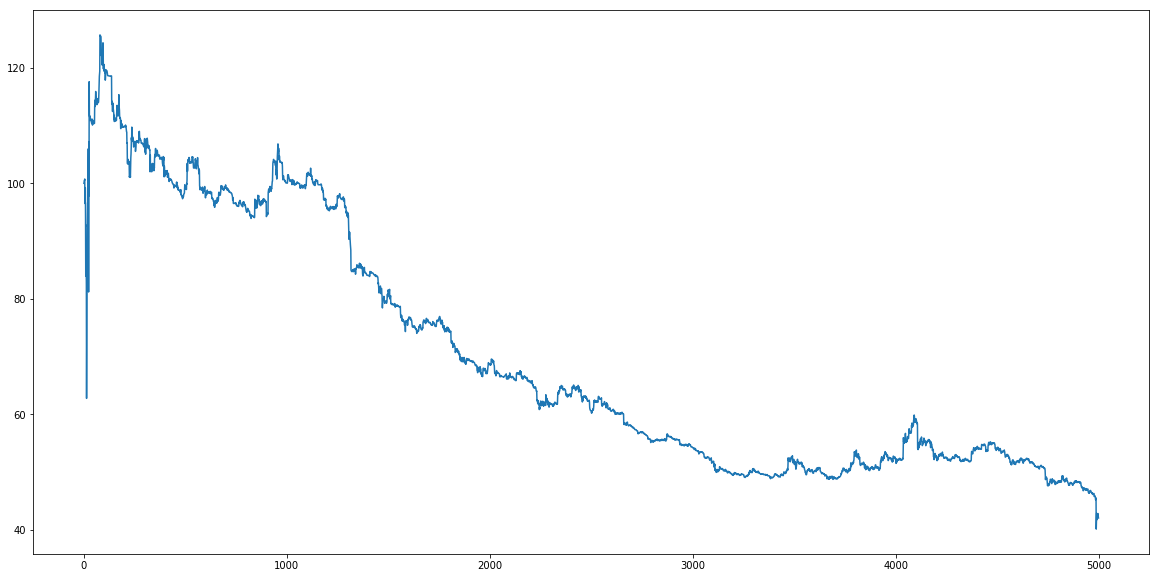

In [7]:
total_list = []
for i in range(5000):
    a.one_step()
    total_list.append(round(float(a._env._FirstEnvironment__total),2))
plt.figure(figsize=(20,10))
plt.plot([a for a in total_list])

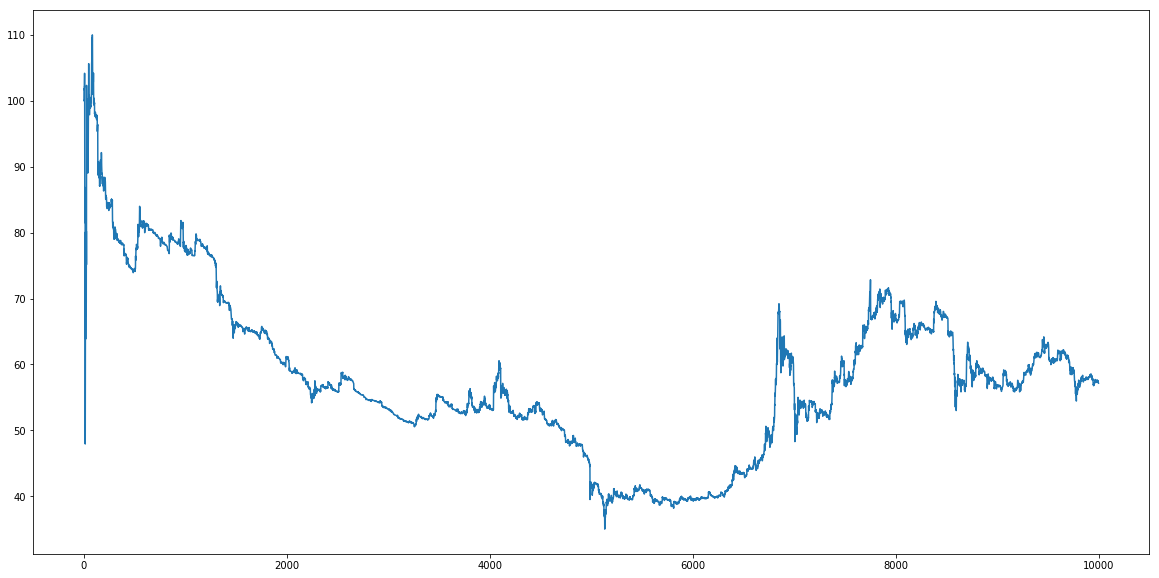

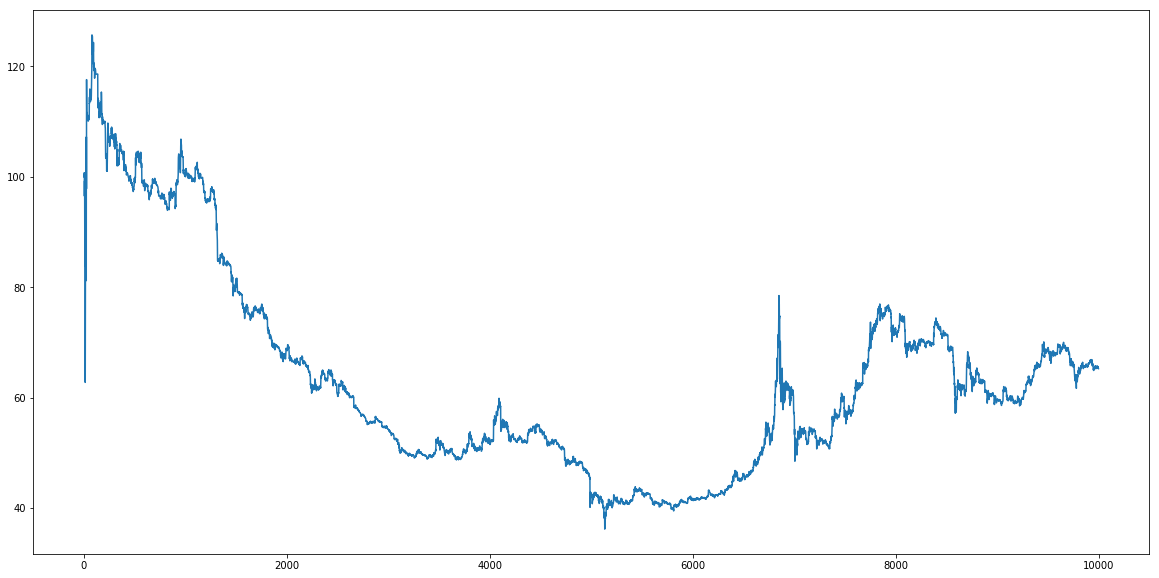

In [8]:
for i in range(5000):
    a.one_step()
    total_list.append(round(float(a._env._FirstEnvironment__total),2))
plt.figure(figsize=(20,10))
plt.plot([a for a in total_list])

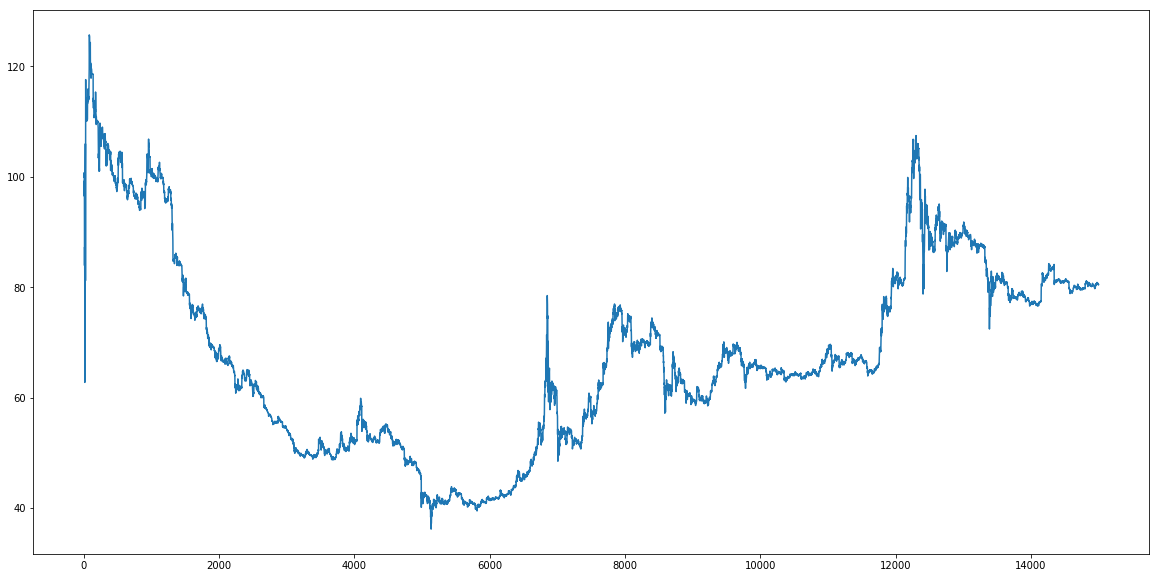

In [9]:
for i in range(5000):
    a.one_step()
    total_list.append(round(float(a._env._FirstEnvironment__total),2))
plt.figure(figsize=(20,10))
plt.plot([a for a in total_list])

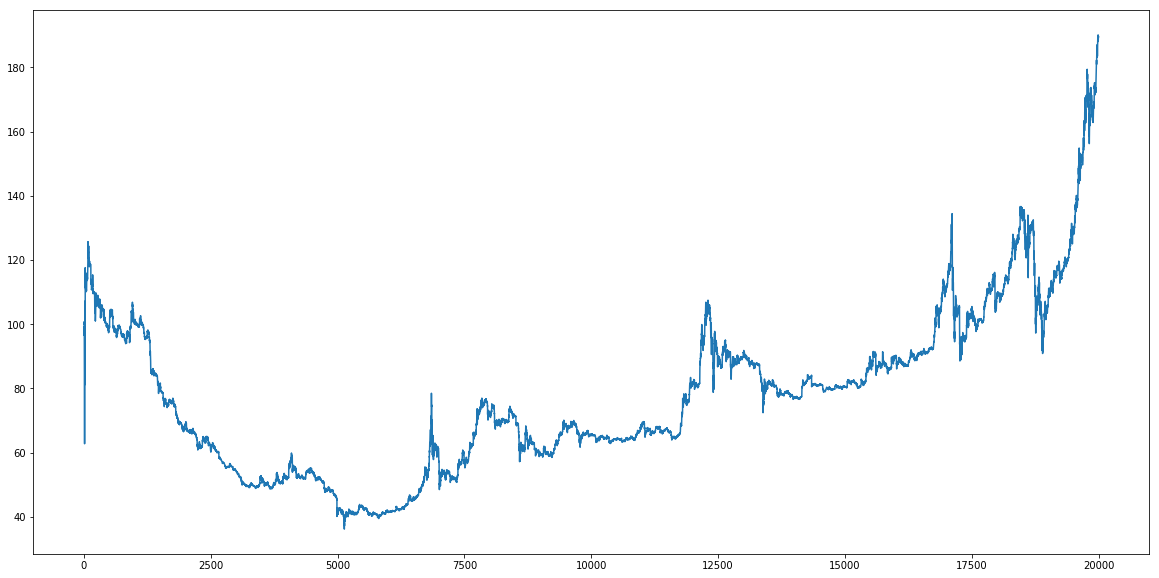

In [10]:
for i in range(5000):
    a.one_step()
    total_list.append(round(float(a._env._FirstEnvironment__total),2))
plt.figure(figsize=(20,10))
plt.plot([a for a in total_list])

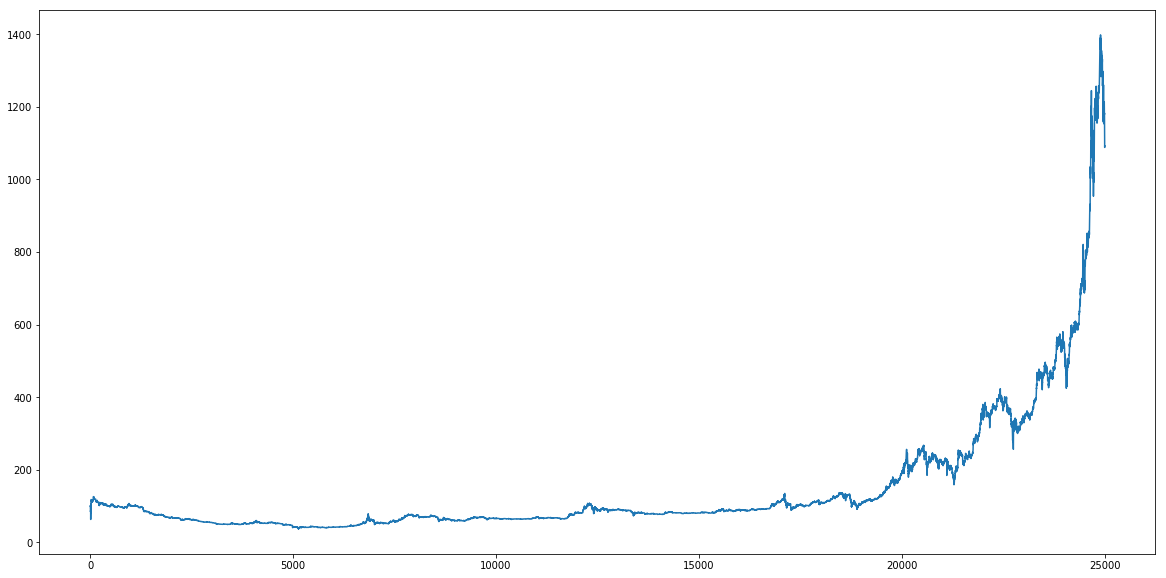

In [11]:
for i in range(5000):
    a.one_step()
    total_list.append(round(float(a._env._FirstEnvironment__total),2))
plt.figure(figsize=(20,10))
plt.plot([a for a in total_list])

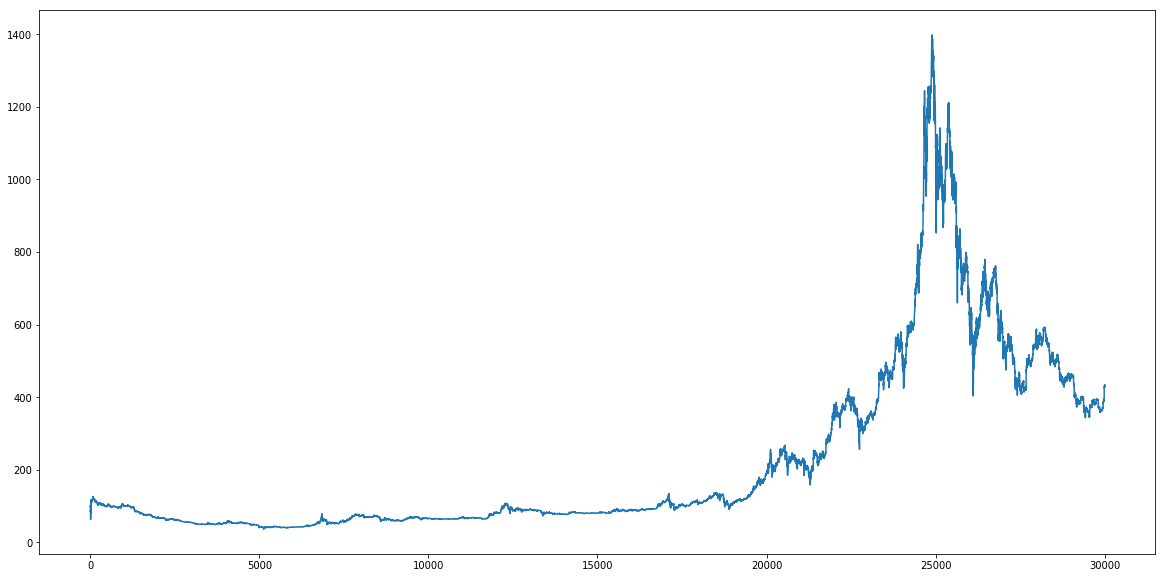

In [12]:
for i in range(5000):
    a.one_step()
    total_list.append(round(float(a._env._FirstEnvironment__total),2))
plt.figure(figsize=(20,10))
plt.plot([a for a in total_list])

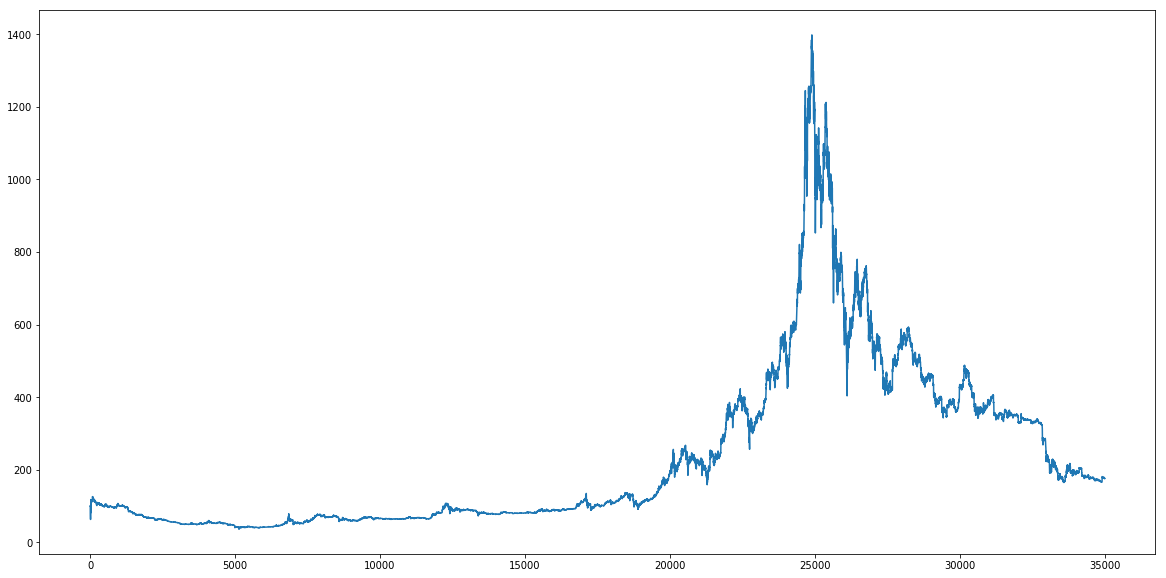

In [13]:
for i in range(5000):
    a.one_step()
    total_list.append(round(float(a._env._FirstEnvironment__total),2))
plt.figure(figsize=(20,10))
plt.plot([a for a in total_list])

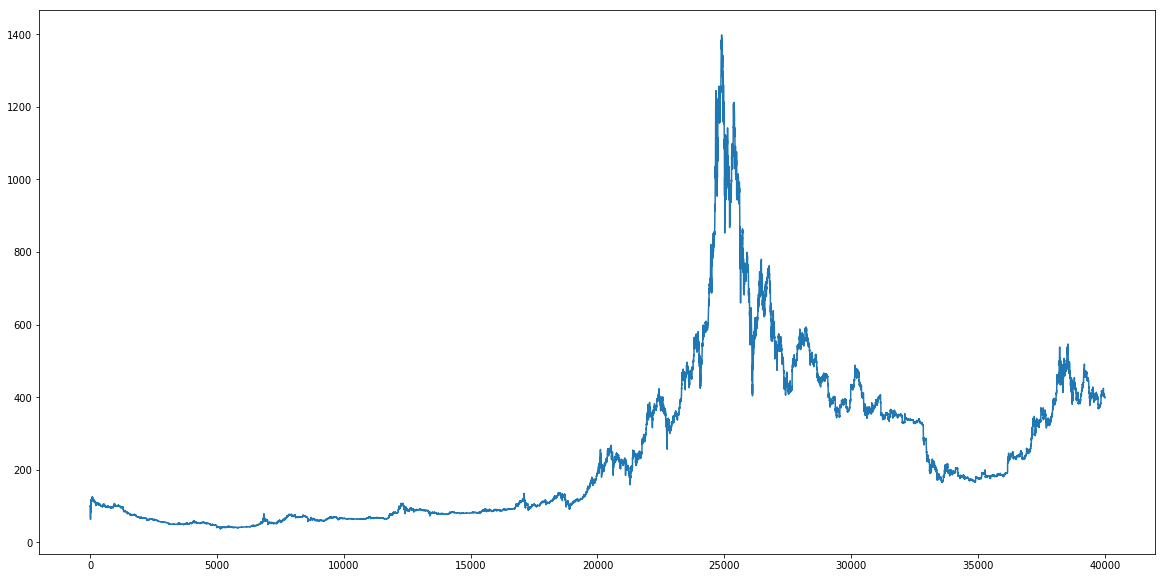

In [14]:
for i in range(5000):
    a.one_step()
    total_list.append(round(float(a._env._FirstEnvironment__total),2))
plt.figure(figsize=(20,10))
plt.plot([a for a in total_list])